<a href="https://colab.research.google.com/github/Elimirage/digital_image_processing_24vvim1/blob/main/lab2%5Clab2_yumaeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 2. Цифровая обработка изображений.**


In [26]:
!pip3 install opencv-python

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
#from google.colab.patches import cv2_imshow

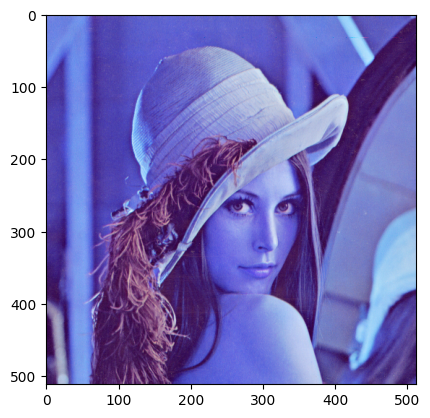

In [28]:
image1 = cv.imread('./lenna.png')
#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(image1[:,:,:])


In [39]:
gray_image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

/tmp/ipython-input-2972860520.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image1.reshape(-1), 256, range)
/tmp/ipython-input-2972860520.py:21: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(eq_image.reshape(-1), 256, range)


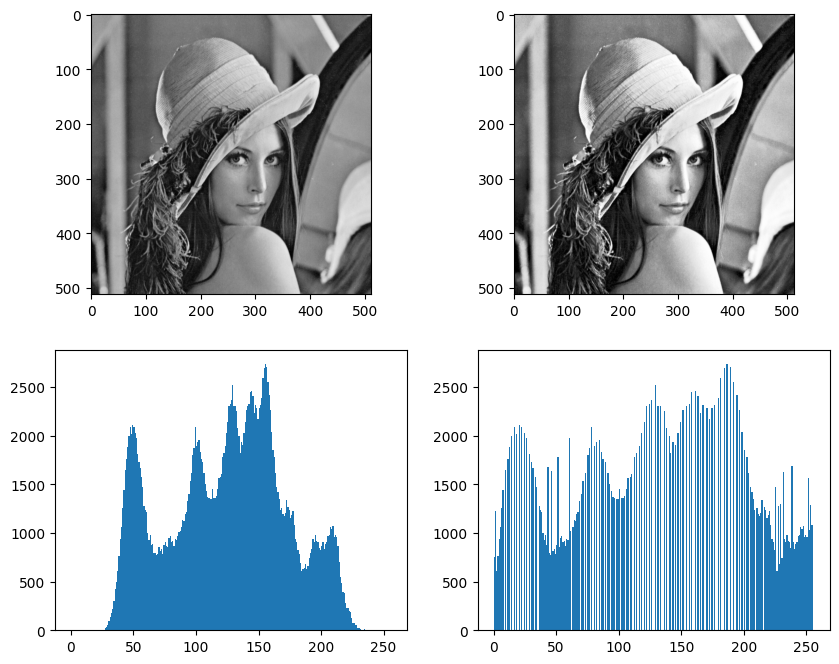

In [38]:
channels = [0]
histSize = [256]
range = [0, 256]

hist = cv.calcHist([gray_image1], channels, None, histSize, range)
cdf = hist.cumsum()
lut = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
#print(lut)
lut=lut.astype('uint8')
#print(lut)
eq_image = lut[gray_image1]
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(gray_image1, cmap='gray')
plt.subplot(gs[1])
plt.imshow(eq_image, cmap='gray')
plt.subplot(gs[2])
plt.hist(gray_image1.reshape(-1), 256, range)
plt.subplot(gs[3])
plt.hist(eq_image.reshape(-1), 256, range)
plt.show()


/tmp/ipython-input-3743959720.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(red.reshape(-1), 256, range)
/tmp/ipython-input-3743959720.py:21: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(red_eq.reshape(-1), 256, range)


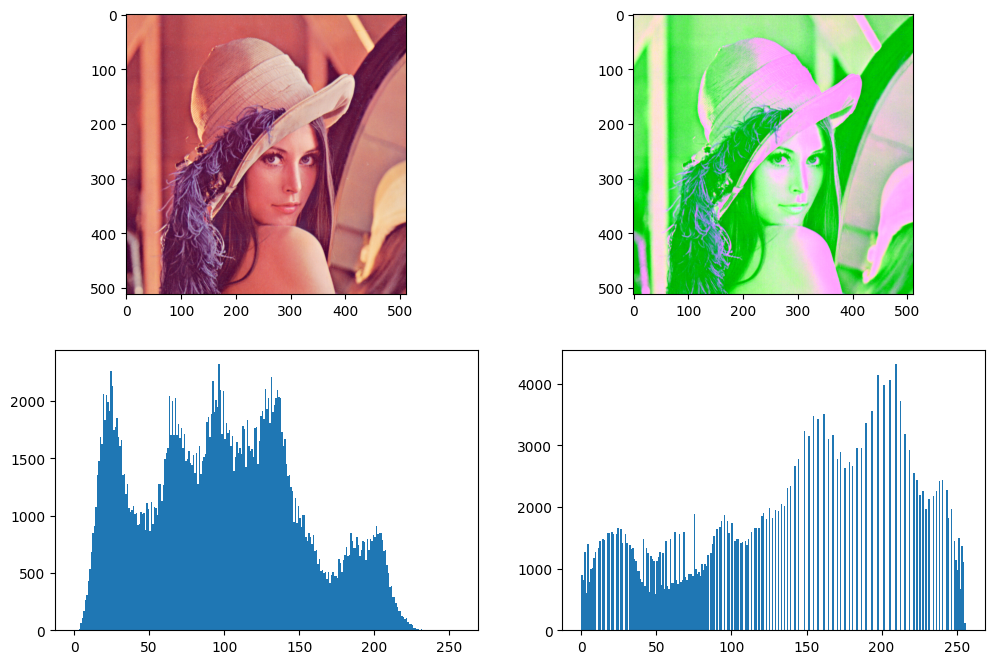

In [50]:
rgb_image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
brightness, red, blue=cv.split(rgb_image1)
hist = cv.calcHist([rgb_image1], channels, None, histSize, range)
cdf = hist.cumsum()
lut = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
lut=lut.astype('uint8')
brightness_eq=lut[brightness]

single_array= cv.merge([brightness, red, blue])
rgb_image = cv.cvtColor(single_array, cv.COLOR_YCrCb2RGB)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(12, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image1)
plt.subplot(gs[1])
plt.imshow(rgb_image)
plt.subplot(gs[2])
plt.hist(red.reshape(-1), 256, range)
plt.subplot(gs[3])
plt.hist(brightness_eq.reshape(-1), 256, range)
plt.show()

